<a href="https://colab.research.google.com/github/adityabhattad2021/Gender-detection-in-thermal-images-videos-using-Deep-Learning/blob/main/model_training_and_testing_for_gender_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

torch.__version__

'2.5.1+cu124'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
import zipfile

def extract_from_zip(zip_file,extract_dir):
  with zipfile.ZipFile(zip_file,"r") as zip_ref:
    zip_ref.extractall(extract_dir)

In [5]:
import os


def walk_through_dir(dir_path):
  for dirpath,dirname, filenames in os.walk(dir_path):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

In [6]:
walk_through_dir("/content/Model_Train_Validation_Test_Data")

There are 1 directories and 0 images in /content/Model_Train_Validation_Test_Data
There are 3 directories and 0 images in /content/Model_Train_Validation_Test_Data/Model (Training + Validation + Test) Data
There are 2 directories and 0 images in /content/Model_Train_Validation_Test_Data/Model (Training + Validation + Test) Data/test
There are 0 directories and 55 images in /content/Model_Train_Validation_Test_Data/Model (Training + Validation + Test) Data/test/MALE
There are 0 directories and 35 images in /content/Model_Train_Validation_Test_Data/Model (Training + Validation + Test) Data/test/FEMALE
There are 2 directories and 0 images in /content/Model_Train_Validation_Test_Data/Model (Training + Validation + Test) Data/valid
There are 0 directories and 393 images in /content/Model_Train_Validation_Test_Data/Model (Training + Validation + Test) Data/valid/MALE
There are 0 directories and 207 images in /content/Model_Train_Validation_Test_Data/Model (Training + Validation + Test) Data/

In [8]:
extract_from_zip("/content/Tufts Data (Processed).zip","/content/Tufts Data (Processed)")
walk_through_dir("/content/Tufts Data (Processed)")

There are 1 directories and 0 images in /content/Tufts Data (Processed)
There are 2 directories and 0 images in /content/Tufts Data (Processed)/Tufts Data (Processed)
There are 0 directories and 485 images in /content/Tufts Data (Processed)/Tufts Data (Processed)/MALE
There are 0 directories and 310 images in /content/Tufts Data (Processed)/Tufts Data (Processed)/FEMALE


In [11]:
extract_from_zip("/content/male-female-orignal.zip","/content/male-female-orignal")
walk_through_dir("/content/male-female-orignal")

There are 1 directories and 0 images in /content/male-female-orignal
There are 3 directories and 0 images in /content/male-female-orignal/male-female
There are 2 directories and 0 images in /content/male-female-orignal/male-female/test
There are 0 directories and 55 images in /content/male-female-orignal/male-female/test/MALE
There are 0 directories and 35 images in /content/male-female-orignal/male-female/test/FEMALE
There are 2 directories and 0 images in /content/male-female-orignal/male-female/valid
There are 0 directories and 197 images in /content/male-female-orignal/male-female/valid/MALE
There are 0 directories and 108 images in /content/male-female-orignal/male-female/valid/FEMALE
There are 2 directories and 0 images in /content/male-female-orignal/male-female/train
There are 0 directories and 484 images in /content/male-female-orignal/male-female/train/MALE
There are 0 directories and 189 images in /content/male-female-orignal/male-female/train/FEMALE


In [12]:
extract_from_zip("/content/male-female.zip","/content/male-female")
walk_through_dir("/content/male-female")

There are 1 directories and 0 images in /content/male-female
There are 3 directories and 0 images in /content/male-female/Model (Training + Validation + Test) Data
There are 2 directories and 0 images in /content/male-female/Model (Training + Validation + Test) Data/test
There are 0 directories and 55 images in /content/male-female/Model (Training + Validation + Test) Data/test/MALE
There are 0 directories and 35 images in /content/male-female/Model (Training + Validation + Test) Data/test/FEMALE
There are 2 directories and 0 images in /content/male-female/Model (Training + Validation + Test) Data/valid
There are 0 directories and 393 images in /content/male-female/Model (Training + Validation + Test) Data/valid/MALE
There are 0 directories and 207 images in /content/male-female/Model (Training + Validation + Test) Data/valid/FEMALE
There are 2 directories and 0 images in /content/male-female/Model (Training + Validation + Test) Data/train
There are 0 directories and 954 images in /con

In [13]:
extract_from_zip("/content/tufts-face-database-thermal-td-ir (1).zip","/content/tufts-face-database-thermal-td-ir")
walk_through_dir("/content/tufts-face-database-thermal-td-ir")

There are 16 directories and 2 images in /content/tufts-face-database-thermal-td-ir
There are 24 directories and 3 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2
There are 0 directories and 5 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2/40
There are 0 directories and 5 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2/35
There are 0 directories and 5 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2/39
There are 0 directories and 5 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2/30
There are 0 directories and 5 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2/34
There are 0 directories and 5 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2/37
There are 0 directories and 5 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2/26
There are 0 directories and 5 images in /content/tufts-face-database-thermal-td-ir/TD_IR_E_Set2/28
There are 0 directories and

In [14]:
extract_from_zip("/content/casia-data.zip","/content/casia-data")
walk_through_dir("/content/casia-data")

There are 1 directories and 0 images in /content/casia-data
There are 2 directories and 0 images in /content/casia-data/casia-data
There are 2 directories and 0 images in /content/casia-data/casia-data/test
There are 0 directories and 3801 images in /content/casia-data/casia-data/test/Female
There are 0 directories and 3970 images in /content/casia-data/casia-data/test/Male
There are 2 directories and 0 images in /content/casia-data/casia-data/train
There are 0 directories and 11341 images in /content/casia-data/casia-data/train/Female
There are 0 directories and 11775 images in /content/casia-data/casia-data/train/Male


Using device: cuda

==== Training Baseline Model (No Augmentation) ====
Class mapping: {'FEMALE': 0, 'MALE': 1}
Number of classes: 2
Total samples before split: 795
Training samples: 636
Testing samples: 159

Training baseline model...
Epoch 1/10, Loss: 1.0934, Test Accuracy: 62.89%
Epoch 2/10, Loss: 0.6297, Test Accuracy: 66.04%
Epoch 3/10, Loss: 0.5925, Test Accuracy: 67.92%
Epoch 4/10, Loss: 0.4872, Test Accuracy: 82.39%
Epoch 5/10, Loss: 0.3220, Test Accuracy: 83.02%
Epoch 6/10, Loss: 0.1992, Test Accuracy: 79.87%
Epoch 7/10, Loss: 0.1207, Test Accuracy: 82.39%
Epoch 8/10, Loss: 0.0997, Test Accuracy: 88.05%
Epoch 9/10, Loss: 0.0563, Test Accuracy: 86.79%
Epoch 10/10, Loss: 0.0238, Test Accuracy: 88.68%

Final test accuracy (baseline model): 88.68%

==== Training Model With Data Augmentation ====

Training augmented model...
Epoch 1/10, Loss: 0.8116, Test Accuracy: 59.75%
Epoch 2/10, Loss: 0.6540, Test Accuracy: 59.75%
Epoch 3/10, Loss: 0.6495, Test Accuracy: 59.12%
Epoch 4/10, Los

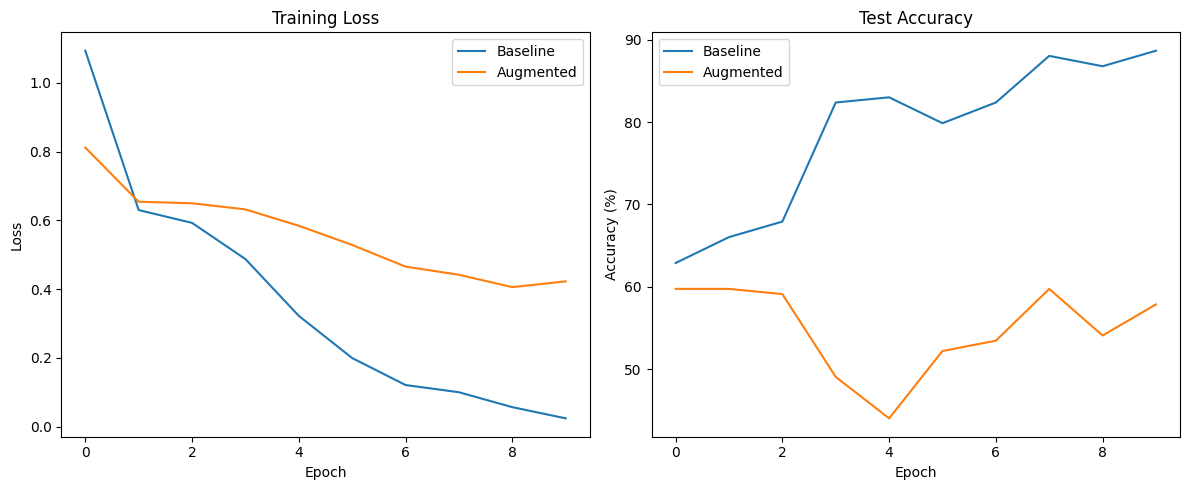


==== Final Results ====
Baseline model final test accuracy: 88.68%
Augmented model final test accuracy: 57.86%
Improvement: -30.82%


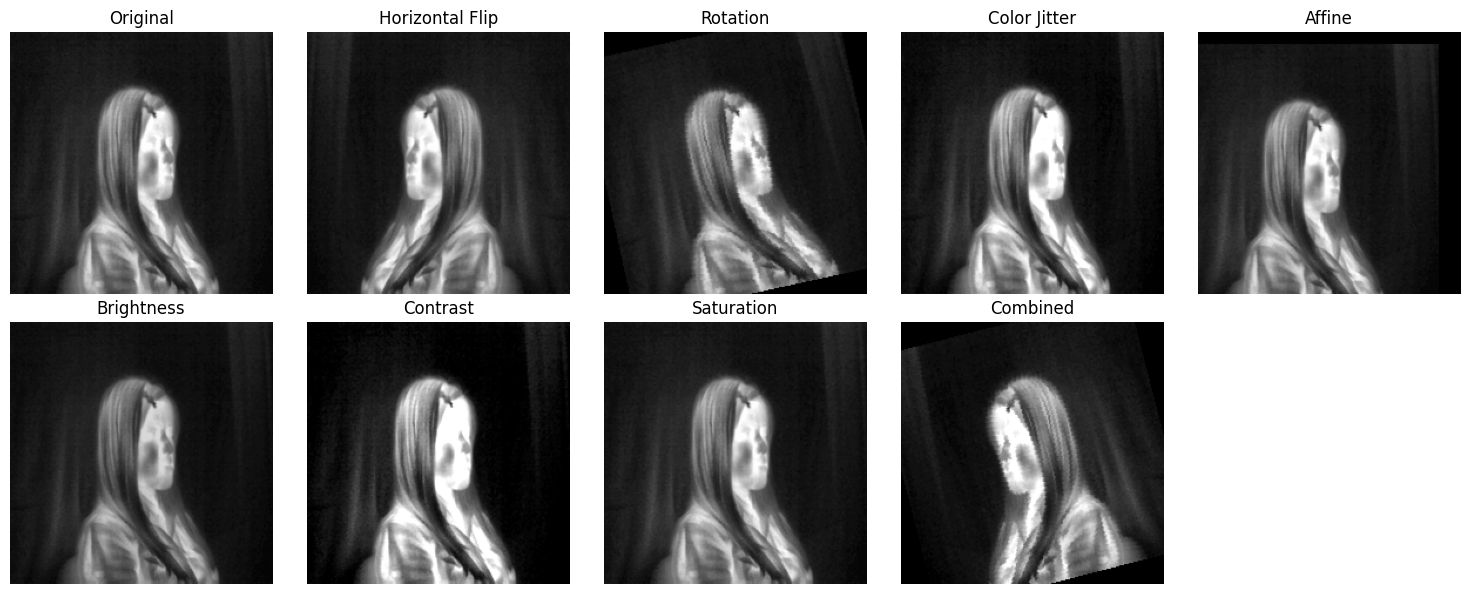

In [27]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from PIL import Image
import copy

# Path to your Tufts dataset
TUFTS_DATA_PATH = "/content/Tufts Data (Processed)/Tufts Data (Processed)"

# Set random seed for reproducibility
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# First, let's train and evaluate without augmentation
print("\n==== Training Baseline Model (No Augmentation) ====")

# Basic transforms (no augmentation)
basic_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset with basic transforms
basic_dataset = datasets.ImageFolder(
    root=TUFTS_DATA_PATH,
    transform=basic_transforms
)

# Check the class mapping
class_names = basic_dataset.classes
print(f"Class mapping: {basic_dataset.class_to_idx}")
print(f"Number of classes: {len(class_names)}")
print(f"Total samples before split: {len(basic_dataset)}")

# Calculate the split sizes
test_size = int(0.2 * len(basic_dataset))  # 20% for testing
train_size = len(basic_dataset) - test_size

# Split the dataset into training and testing sets
basic_train_dataset, basic_test_dataset = random_split(
    basic_dataset,
    [train_size, test_size]
)

# Create data loaders
basic_train_loader = DataLoader(
    basic_train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

basic_test_loader = DataLoader(
    basic_test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

print(f"Training samples: {len(basic_train_dataset)}")
print(f"Testing samples: {len(basic_test_dataset)}")

# Initialize a simple CNN model for binary classification
def create_model():
    return torch.nn.Sequential(
        torch.nn.Conv2d(3, 16, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2),
        torch.nn.Conv2d(16, 32, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2),
        torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2),
        torch.nn.Flatten(),
        torch.nn.Linear(64 * 28 * 28, 512),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(512, len(class_names))
    ).to(device)

# Training function
def train_and_evaluate(train_loader, test_loader, model_name, num_epochs=10):
    model = create_model()

    # Loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    print(f"\nTraining {model_name} model...")
    train_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        # Evaluate on test set
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    print(f"\nFinal test accuracy ({model_name} model): {test_accuracies[-1]:.2f}%")
    return model, train_losses, test_accuracies

# Train and evaluate baseline model
basic_model, basic_losses, basic_accuracies = train_and_evaluate(
    basic_train_loader, basic_test_loader, "baseline", num_epochs=10
)

# Now, let's train and evaluate with augmentation
print("\n==== Training Model With Data Augmentation ====")

# Define transforms for data augmentation
augmentation_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset with augmentation transforms
augmented_dataset = datasets.ImageFolder(
    root=TUFTS_DATA_PATH,
    transform=augmentation_transforms
)

# Split the dataset into training and testing sets
augmented_train_dataset, augmented_test_dataset = random_split(
    augmented_dataset,
    [train_size, test_size]
)

# Create dataset wrapper for applying different transforms to test set
class DatasetWrapper(Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        # We need to convert back to PIL for transforms
        if isinstance(image, torch.Tensor):
            image = transforms.ToPILImage()(image)
        return self.transform(image), label

# Apply basic transforms to the test dataset (no augmentation for test)
augmented_test_dataset = DatasetWrapper(augmented_test_dataset, basic_transforms)

# Create data loaders
augmented_train_loader = DataLoader(
    augmented_train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

augmented_test_loader = DataLoader(
    augmented_test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

# Train and evaluate augmented model
augmented_model, augmented_losses, augmented_accuracies = train_and_evaluate(
    augmented_train_loader, augmented_test_loader, "augmented", num_epochs=10
)

# Visualize the results
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(basic_losses, label='Baseline')
plt.plot(augmented_losses, label='Augmented')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(basic_accuracies, label='Baseline')
plt.plot(augmented_accuracies, label='Augmented')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
print("\n==== Final Results ====")
print(f"Baseline model final test accuracy: {basic_accuracies[-1]:.2f}%")
print(f"Augmented model final test accuracy: {augmented_accuracies[-1]:.2f}%")
print(f"Improvement: {augmented_accuracies[-1] - basic_accuracies[-1]:.2f}%")

# Visualize samples with augmentation
def show_augmented_samples():
    # Create a batch of identical images and apply different augmentations
    # Get one sample image
    original_dataset = datasets.ImageFolder(
        root=TUFTS_DATA_PATH,
        transform=transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
    )

    sample_image, label = original_dataset[0]
    sample_image_pil = transforms.ToPILImage()(sample_image)

    # Create different augmentations of the same image
    plt.figure(figsize=(15, 6))

    # Show original image
    plt.subplot(2, 5, 1)
    plt.imshow(sample_image_pil)
    plt.title("Original")
    plt.axis("off")

    # Apply different augmentations
    augmentations = [
        ("Horizontal Flip", transforms.RandomHorizontalFlip(p=1.0)),
        ("Rotation", transforms.RandomRotation(degrees=15)),
        ("Color Jitter", transforms.ColorJitter(brightness=0.2, contrast=0.2)),
        ("Affine", transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))),
        ("Brightness", transforms.ColorJitter(brightness=0.5)),
        ("Contrast", transforms.ColorJitter(contrast=0.5)),
        ("Saturation", transforms.ColorJitter(saturation=0.5)),
        ("Combined", transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2)
        ]))
    ]

    for i, (title, transform) in enumerate(augmentations):
        augmented = transform(sample_image_pil)
        plt.subplot(2, 5, i+2)
        plt.imshow(augmented)
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Show augmentation examples
show_augmented_samples()

In [15]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from PIL import Image
import copy

In [19]:
TUFTS_DATA_PATH = "/content/Tufts Data (Processed)/Tufts Data (Processed)"

In [20]:
basic_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [21]:
basic_dataset = datasets.ImageFolder(
    root=TUFTS_DATA_PATH,
    transform=basic_transforms
)

In [22]:
class_names = basic_dataset.classes
print(f"Class mapping: {basic_dataset.class_to_idx}")
print(f"Number of classes: {len(class_names)}")
print(f"Total samples before split: {len(basic_dataset)}")

Class mapping: {'FEMALE': 0, 'MALE': 1}
Number of classes: 2
Total samples before split: 795


In [23]:
test_size = int(0.2 * len(basic_dataset))  # 20% for testing
train_size = len(basic_dataset) - test_size

In [24]:
basic_train_dataset, basic_test_dataset = random_split(
    basic_dataset,
    [train_size, test_size]
)

In [25]:
basic_train_loader = DataLoader(
    basic_train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

basic_test_loader = DataLoader(
    basic_test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

In [26]:
print(f"Training samples: {len(basic_train_dataset)}")
print(f"Testing samples: {len(basic_test_dataset)}")

Training samples: 636
Testing samples: 159


In [34]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets, models
import matplotlib.pyplot as plt
from PIL import Image
import copy
import time
import torch.nn as nn
import torch.optim as optim

# Path to your Tufts dataset
TUFTS_DATA_PATH = "/content/Tufts Data (Processed)/Tufts Data (Processed)"

# Set random seed for reproducibility
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Define transforms for AlexNet and Inception v3
# AlexNet expects 224x224 images
alexnet_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Inception v3 expects 299x299 images
inception_transforms = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define data augmentation transforms
alexnet_aug_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

inception_aug_transforms = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset wrapper for applying different transforms to test set
class DatasetWrapper(Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        # We need to convert back to PIL for transforms
        if isinstance(image, torch.Tensor):
            image = transforms.ToPILImage()(image)
        return self.transform(image), label

# Function to load and prepare dataset
def prepare_dataset(transform, aug_transform=None):
    # Load the dataset
    dataset = datasets.ImageFolder(
        root=TUFTS_DATA_PATH,
        transform=transform
    )

    # Check the class mapping
    class_names = dataset.classes
    print(f"Class mapping: {dataset.class_to_idx}")
    print(f"Number of classes: {len(class_names)}")
    print(f"Total samples: {len(dataset)}")

    # Calculate the split sizes
    test_size = int(0.2 * len(dataset))  # 20% for testing
    train_size = len(dataset) - test_size

    # Split the dataset into training and testing sets
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

    # Apply augmentation to training set if specified
    if aug_transform:
        train_dataset = DatasetWrapper(train_dataset, aug_transform)

    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=32,
        shuffle=True,
        num_workers=2
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=32,
        shuffle=False,
        num_workers=2
    )

    print(f"Training samples: {len(train_dataset)}")
    print(f"Testing samples: {len(test_dataset)}")

    return train_loader, test_loader, len(class_names)

# Function to modify pretrained model for our dataset
def setup_model(model_name, num_classes):
    if model_name == 'alexnet':
        model = models.alexnet(pretrained=True)
        # Freeze all layers
        for param in model.parameters():
            param.requires_grad = False
        # Modify the classifier
        model.classifier[6] = nn.Linear(4096, num_classes)

    elif model_name == 'inception':
        model = models.inception_v3(pretrained=True, aux_logits=True)
        # Freeze all layers
        for param in model.parameters():
            param.requires_grad = False
        # Modify the classifier
        model.fc = nn.Linear(2048, num_classes)
        model.AuxLogits.fc = nn.Linear(768, num_classes)

        # Fix for the warning about missing transform in inception
        model.transform_input = False

    return model.to(device)

# Training function
def train_model(model, train_loader, test_loader, model_name, num_epochs=10):
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()

    # Only optimize parameters that require gradients
    params_to_update = [p for p in model.parameters() if p.requires_grad]
    optimizer = optim.Adam(params_to_update, lr=0.001)

    # Training loop
    print(f"\nTraining {model_name} model...")
    train_losses = []
    test_accuracies = []
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())

    since = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            # Special handling for Inception v3 which returns InceptionOutputs when training
            if model_name == 'inception':
                outputs,_ = model(images)
                # For Inception v3, outputs is a namedtuple with 'logits' and 'aux_logits'
                loss1 = criterion(outputs.logits, labels)
                loss2 = criterion(outputs.aux_logits, labels)
                loss = loss1 + 0.4*loss2
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        # Evaluate on test set
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)

                if model_name == 'inception':
                    # When in eval mode, Inception returns a tuple with the main output
                    outputs, _ = model(images)
                else:
                    outputs = model(images)

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

        # Save the best model
        if accuracy > best_acc:
            best_acc = accuracy
            best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best test accuracy: {best_acc:.2f}%")

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_losses, test_accuracies

# ===== AlexNet (without augmentation) =====
print("\n===== Training AlexNet (without augmentation) =====")
alexnet_train_loader, alexnet_test_loader, num_classes = prepare_dataset(alexnet_transforms)
alexnet_model = setup_model('alexnet', num_classes)
alexnet_model, alexnet_losses, alexnet_accuracies = train_model(
    alexnet_model, alexnet_train_loader, alexnet_test_loader, "alexnet", num_epochs=10
)

# ===== AlexNet (with augmentation) =====
print("\n===== Training AlexNet (with augmentation) =====")
alexnet_aug_train_loader, alexnet_aug_test_loader, _ = prepare_dataset(
    alexnet_transforms, alexnet_aug_transforms
)
alexnet_aug_model = setup_model('alexnet', num_classes)
alexnet_aug_model, alexnet_aug_losses, alexnet_aug_accuracies = train_model(
    alexnet_aug_model, alexnet_aug_train_loader, alexnet_aug_test_loader, "alexnet", num_epochs=10
)

# ===== Inception v3 (without augmentation) =====
print("\n===== Training Inception v3 (without augmentation) =====")
inception_train_loader, inception_test_loader, _ = prepare_dataset(inception_transforms)
inception_model = setup_model('inception', num_classes)
inception_model, inception_losses, inception_accuracies = train_model(
    inception_model, inception_train_loader, inception_test_loader, "inception", num_epochs=10
)

# ===== Inception v3 (with augmentation) =====
print("\n===== Training Inception v3 (with augmentation) =====")
inception_aug_train_loader, inception_aug_test_loader, _ = prepare_dataset(
    inception_transforms, inception_aug_transforms
)
inception_aug_model = setup_model('inception', num_classes)
inception_aug_model, inception_aug_losses, inception_aug_accuracies = train_model(
    inception_aug_model, inception_aug_train_loader, inception_aug_test_loader, "inception", num_epochs=10
)

# Visualize the results
plt.figure(figsize=(15, 10))

# Plot training loss
plt.subplot(2, 2, 1)
plt.plot(alexnet_losses, label='AlexNet')
plt.plot(alexnet_aug_losses, label='AlexNet + Aug')
plt.plot(inception_losses, label='Inception v3')
plt.plot(inception_aug_losses, label='Inception v3 + Aug')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 2)
plt.plot(alexnet_accuracies, label='AlexNet')
plt.plot(alexnet_aug_accuracies, label='AlexNet + Aug')
plt.plot(inception_accuracies, label='Inception v3')
plt.plot(inception_aug_accuracies, label='Inception v3 + Aug')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

# Compare AlexNet vs AlexNet with augmentation
plt.subplot(2, 2, 3)
plt.plot(alexnet_accuracies, label='AlexNet')
plt.plot(alexnet_aug_accuracies, label='AlexNet + Aug')
plt.title('AlexNet: Effect of Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

# Compare Inception vs Inception with augmentation
plt.subplot(2, 2, 4)
plt.plot(inception_accuracies, label='Inception v3')
plt.plot(inception_aug_accuracies, label='Inception v3 + Aug')
plt.title('Inception v3: Effect of Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
print("\n==== Final Results ====")
print(f"AlexNet final test accuracy: {alexnet_accuracies[-1]:.2f}%")
print(f"AlexNet with augmentation final test accuracy: {alexnet_aug_accuracies[-1]:.2f}%")
print(f"Improvement with augmentation (AlexNet): {alexnet_aug_accuracies[-1] - alexnet_accuracies[-1]:.2f}%")
print()
print(f"Inception v3 final test accuracy: {inception_accuracies[-1]:.2f}%")
print(f"Inception v3 with augmentation final test accuracy: {inception_aug_accuracies[-1]:.2f}%")
print(f"Improvement with augmentation (Inception v3): {inception_aug_accuracies[-1] - inception_accuracies[-1]:.2f}%")
print()
print(f"Best model: {'Inception v3 with augmentation' if inception_aug_accuracies[-1] > alexnet_aug_accuracies[-1] else 'AlexNet with augmentation'}")

Using device: cuda

===== Training AlexNet (without augmentation) =====
Class mapping: {'FEMALE': 0, 'MALE': 1}
Number of classes: 2
Total samples: 795
Training samples: 636
Testing samples: 159

Training alexnet model...
Epoch 1/10, Loss: 0.4602, Test Accuracy: 89.94%
Epoch 2/10, Loss: 0.3574, Test Accuracy: 86.79%
Epoch 3/10, Loss: 0.3164, Test Accuracy: 90.57%
Epoch 4/10, Loss: 0.2810, Test Accuracy: 91.82%
Epoch 5/10, Loss: 0.3099, Test Accuracy: 91.82%
Epoch 6/10, Loss: 0.2722, Test Accuracy: 94.34%
Epoch 7/10, Loss: 0.2349, Test Accuracy: 93.08%
Epoch 8/10, Loss: 0.2389, Test Accuracy: 94.34%
Epoch 9/10, Loss: 0.2227, Test Accuracy: 91.82%
Epoch 10/10, Loss: 0.2299, Test Accuracy: 94.97%
Training complete in 0m 24s
Best test accuracy: 94.97%

===== Training AlexNet (with augmentation) =====
Class mapping: {'FEMALE': 0, 'MALE': 1}
Number of classes: 2
Total samples: 795
Training samples: 636
Testing samples: 159

Training alexnet model...
Epoch 1/10, Loss: 0.6955, Test Accuracy: 4

AttributeError: 'Tensor' object has no attribute 'logits'